In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [15]:
train.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [16]:
def convert_dates(x):
    x['date']=pd.to_datetime(x['date'])
    x['month']=x['date'].dt.month
    x['year']=x['date'].dt.year
    x['dayofweek']=x['date'].dt.dayofweek
    x.pop('date')
    return x
train = convert_dates(train)
test = convert_dates(test)

In [ ]:
def add_avg(x):
    x['daily_avg']=x.groupby(['item','store','dayofweek'])['sales'].transform('mean')
    x['monthly_avg']=x.groupby(['item','store','month'])['sales'].transform('mean')
    return x
df = add_avg(df)

In [17]:
train.head()

store  item  sales  month  year  dayofweek
0      1     1     13      1  2013          1
1      1     1     11      1  2013          2
2      1     1     14      1  2013          3
3      1     1     13      1  2013          4
4      1     1     10      1  2013          5

In [ ]:
daily_avg = df.groupby(['item','store','dayofweek'])['sales'].mean().reset_index()
monthly_avg = df.groupby(['item','store','month'])['sales'].mean().reset_index()

In [18]:
train_x, val_x, train_y, val_y = train_test_split(train.drop('sales',axis=1),train.pop('sales'),random_state=123,test_size=0.2)

In [19]:
def XGBmodel(train_x, val_x, train_y, val_y):
    matrix_train = xgb.DMatrix(train_x, label=train_y)
    matrix_val = xgb.DMatrix(val_x, label=val_y)
    model=xgb.train(params={'objective':'reg:linear','eval_metric':'mae'}
                    ,dtrain=matrix_train,num_boost_round=500, 
                    early_stopping_rounds=20,evals=[(matrix_val,'val')],)
    return model

model=XGBmodel(train_x, val_x, train_y, val_y)

[19:09:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[0]	val-mae:36.4526
Will train until val-mae hasn't improved in 20 rounds.
[19:10:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[1]	val-mae:26.4908
[19:10:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[2]	val-mae:21.0182
[19:10:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3]	val-mae:17.8153
[19:10:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[4]	val-mae:16.2346
[19:10:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[5]	val-mae:15.267
[19:10:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[6]	val-mae:14.0907
[19:10:02] src/

[19:10:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[61]	val-mae:6.26563
[19:10:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[62]	val-mae:6.24674
[19:10:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[63]	val-mae:6.24108
[19:10:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[64]	val-mae:6.23038
[19:10:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[65]	val-mae:6.22147
[19:10:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[66]	val-mae:6.21553
[19:10:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[67]	val-mae:6.20243
[19:10:28] src/tree/updater_prune.cc:74: tree pruning end, 1 r

[19:10:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[123]	val-mae:5.83272
[19:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[124]	val-mae:5.83092
[19:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[125]	val-mae:5.82963
[19:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[126]	val-mae:5.82707
[19:10:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[127]	val-mae:5.82532
[19:10:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[128]	val-mae:5.82031
[19:10:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[129]	val-mae:5.81673
[19:10:53] src/tree/updater_prune.cc:74: tree pruning e

[19:11:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[184]	val-mae:5.72631
[19:11:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[185]	val-mae:5.72508
[19:11:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[186]	val-mae:5.72274
[19:11:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[187]	val-mae:5.7217
[19:11:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[188]	val-mae:5.72043
[19:11:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[189]	val-mae:5.71992
[19:11:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[190]	val-mae:5.71888
[19:11:19] src/tree/updater_prune.cc:74: tree pruning en

[19:11:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[245]	val-mae:5.68297
[19:11:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[246]	val-mae:5.68229
[19:11:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[247]	val-mae:5.68173
[19:11:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[248]	val-mae:5.68108
[19:11:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[249]	val-mae:5.68081
[19:11:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[250]	val-mae:5.6805
[19:11:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[251]	val-mae:5.68019
[19:11:45] src/tree/updater_prune.cc:74: tree pruning en

[19:12:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[306]	val-mae:5.66286
[19:12:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[307]	val-mae:5.66275
[19:12:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[308]	val-mae:5.66248
[19:12:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[309]	val-mae:5.66217
[19:12:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[310]	val-mae:5.66183
[19:12:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[311]	val-mae:5.66157
[19:12:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[312]	val-mae:5.66145
[19:12:12] src/tree/updater_prune.cc:74: tree pruning e

[19:12:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[367]	val-mae:5.65018
[19:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[368]	val-mae:5.64987
[19:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[369]	val-mae:5.64987
[19:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[370]	val-mae:5.64987
[19:12:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[371]	val-mae:5.64979
[19:12:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[372]	val-mae:5.64943
[19:12:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[373]	val-mae:5.64904
[19:12:37] src/tree/updater_prune.cc:74: tree pruning e

[19:13:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[428]	val-mae:5.64199
[19:13:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[429]	val-mae:5.64194
[19:13:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[430]	val-mae:5.64196
[19:13:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[431]	val-mae:5.64184
[19:13:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[432]	val-mae:5.64185
[19:13:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[433]	val-mae:5.64177
[19:13:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[434]	val-mae:5.64163
[19:13:03] src/tree/updater_prune.cc:74: tree pruning e

[19:13:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[489]	val-mae:5.63812
[19:13:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[490]	val-mae:5.63805
[19:13:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[491]	val-mae:5.63788
[19:13:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[492]	val-mae:5.63786
[19:13:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[493]	val-mae:5.63776
[19:13:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[494]	val-mae:5.63779
[19:13:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[495]	val-mae:5.63772
[19:13:30] src/tree/updater_prune.cc:74: tree pruning e

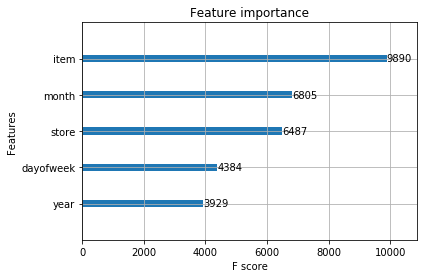

In [20]:
plot_importance(model)
plt.show()

In [ ]:
#케라스 50으로 한번, 추가 피쳐 없는걸로 한번, 추가 피쳐 넣어서 한번


In [ ]:
x_train

In [ ]:
submission = pd.DataFrame(x_pred.pop('id'))
y_pred = model.predict(xgb.DMatrix(x_pred), ntree_limit = model.best_ntree_limit)

submission['sales']= y_pred

submission.to_csv('sub3.csv',index=False)